In [ ]:
import pandas as pd
import glob
import numpy as np
import os
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import seaborn as sns

In [ ]:
file_path = "/content/drive/MyDrive/stocks"

files = glob.glob(file_path + "/*.csv")
#We will only extract NASDAQ-100 and NASDAQ Financial-100 stock data

In [ ]:
#Webscraping NASDAQ-100 tickers
url_1 = "https://en.wikipedia.org/wiki/Nasdaq-100#Components"

html_1 = requests.get(url_1).text
soup_1 = BeautifulSoup(html_1, "html.parser")

print(soup_1)

In [ ]:
tickers_list1 = soup_1.find_all("table", {"id": "constituents"})

tickers_list1 #All the tickers but with extra information we don't need

In [ ]:
all_cells = []
for elements in tickers_list1:
  rows = elements.find_all("tr")
  for row in rows:
    row_cells = row.find_all("td")
    for cell in row_cells:
      all_cells.append(cell.text)

print(all_cells)
tickers_nasdaq100 = all_cells[1 :: 4]
print(tickers_nasdaq100) #Part of the stocks we need to extract from the dataset
len(tickers_nasdaq100)

['Adobe Inc.', 'ADBE', 'Information Technology', 'Application Software\n', 'ADP', 'ADP', 'Industrials', 'Human Resource & Employment Services\n', 'Airbnb', 'ABNB', 'Consumer Discretionary', 'Hotels, Resorts & Cruise Lines\n', 'Alphabet Inc. (Class A)', 'GOOGL', 'Communication Services', 'Interactive Media & Services\n', 'Alphabet Inc. (Class C)', 'GOOG', 'Communication Services', 'Interactive Media & Services\n', 'Amazon', 'AMZN', 'Consumer Discretionary', 'Broadline Retail\n', 'Advanced Micro Devices Inc.', 'AMD', 'Information Technology', 'Semiconductors\n', 'American Electric Power', 'AEP', 'Utilities', 'Electric Utilities\n', 'Amgen', 'AMGN', 'Health Care', 'Biotechnology\n', 'Analog Devices', 'ADI', 'Information Technology', 'Semiconductors\n', 'Ansys', 'ANSS', 'Information Technology', 'Application Software\n', 'Apple Inc.', 'AAPL', 'Information Technology', 'Technology Hardware, Storage & Peripherals\n', 'Applied Materials', 'AMAT', 'Information Technology', 'Semiconductor Equip

101

In [ ]:
#Webscraping NASDAQ Financial-100
url_2 = "https://trendspider.com/learning-center/nasdaq-financial-100-index/"

headers = {"User-Agent": "Mozilla/5.0 (X11; CrOS x86_64 12871.102.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.141 Safari/537.36"}

html_2 = requests.get(url_2, headers=headers).text

soup_2 = BeautifulSoup(html_2, "html.parser")

table_tickers = soup_2.find("table")
table_tickers

In [ ]:
tickers_list2 = table_tickers.find_all("td", {"class":"has-text-align-left"})
print(tickers_list2)

[<td class="has-text-align-left" data-align="left"><a aria-label="Symbol info: ABCB" class="inline-ticker" href="https://trendspider.com/markets/symbols/ABCB/" target="_blank"><i class="icon"><img alt="Logo of ABCB" decoding="async" height="32" loading="lazy" src="https://companieslogo.com/img2/32/ABCB-31c277355ed874e357b6ad-607328bd.png?t=1600951830" width="32"/></i><span>ABCB</span></a></td>, <td class="has-text-align-left" data-align="left"><a href="https://trendspider.com/markets/symbols/ABCB/" rel="noreferrer noopener" target="_blank">Ameris Bancorp</a></td>, <td class="has-text-align-left" data-align="left"><a href="https://trendspider.com/markets/symbols/ABCB/" rel="noreferrer noopener" target="_blank">See free <strong>ABCB</strong> Stock Chart 🡒</a></td>, <td class="has-text-align-left" data-align="left"><a aria-label="Symbol info: ACGL" class="inline-ticker" href="https://trendspider.com/markets/symbols/ACGL/" target="_blank"><i class="icon"><img alt="Logo of ACGL" decoding="a

In [ ]:
tickers_financial100 = []

for el in tickers_list2:
  for row in el:
    if row.find("span") == None:
      continue
    else:
      ticker = row.find("span")
    tickers_financial100.append(ticker.text)

print(tickers_financial100) #The other part of the stocks that we need to extract from the dataset
len(tickers_financial100)

['ABCB', 'ACGL', 'AUB', 'BANF', 'BANR', 'BHF', 'BOKF', 'BPOP', 'CACC', 'CATY', 'CBSH', 'CFFN', 'CG', 'CINF', 'CLBK', 'CME', 'COLB', 'CVBF', 'EBC', 'EHTH', 'ERIE', 'ESGR', 'EWBC', 'FCFS', 'FCNCA', 'FFBC', 'FFIN', 'FHB', 'FITB', 'FOCS', 'FRME', 'FULT', 'FUTU', 'GBCI', 'GSHD', 'HBAN', 'HLNE', 'HOMB', 'HTLF', 'HWC', 'IBKR', 'IBOC', 'IBTX', 'KNSL', 'LOB', 'LPLA', 'LPRO', 'MKTX', 'MORN', 'NAVI', 'NDAQ', 'NMIH', 'NTRS', 'ONB', 'OPEN', 'PACW', 'PFG', 'PNFP', 'PPBI', 'QFIN', 'RILY', 'RNST', 'SASR', 'SBCF', 'SFNC', 'SIGI', 'SLM', 'TCBI', 'TFSL', 'TOWN', 'TREE', 'TRMK', 'TROW', 'TRUP', 'TW', 'UBSI', 'UCBI', 'UMBF', 'UPST', 'VIRT', 'VLY', 'VRTS', 'WABC', 'WAFD', 'WERN', 'WSFS', 'WTFC', 'XP', 'ZION']


89

In [ ]:
needed_tickers = tickers_nasdaq100 + tickers_financial100
print(needed_tickers)
print(len(needed_tickers))

for i in range(0, 190):
  needed_tickers[i] = needed_tickers[i] + ".csv"

print(needed_tickers)

['ADBE', 'ADP', 'ABNB', 'GOOGL', 'GOOG', 'AMZN', 'AMD', 'AEP', 'AMGN', 'ADI', 'ANSS', 'AAPL', 'AMAT', 'ASML', 'AZN', 'TEAM', 'ADSK', 'BKR', 'BIIB', 'BKNG', 'AVGO', 'CDNS', 'CDW', 'CHTR', 'CTAS', 'CSCO', 'CCEP', 'CTSH', 'CMCSA', 'CEG', 'CPRT', 'CSGP', 'COST', 'CRWD', 'CSX', 'DDOG', 'DXCM', 'FANG', 'DLTR', 'DASH', 'EA', 'EXC', 'FAST', 'FTNT', 'GEHC', 'GILD', 'GFS', 'HON', 'IDXX', 'ILMN', 'INTC', 'INTU', 'ISRG', 'KDP', 'KLAC', 'KHC', 'LRCX', 'LULU', 'MAR', 'MRVL', 'MELI', 'META', 'MCHP', 'MU', 'MSFT', 'MRNA', 'MDLZ', 'MDB', 'MNST', 'NFLX', 'NVDA', 'NXPI', 'ORLY', 'ODFL', 'ON', 'PCAR', 'PANW', 'PAYX', 'PYPL', 'PDD', 'PEP', 'QCOM', 'REGN', 'ROP', 'ROST', 'SIRI', 'SPLK', 'SBUX', 'SNPS', 'TTWO', 'TMUS', 'TSLA', 'TXN', 'TTD', 'VRSK', 'VRTX', 'WBA', 'WBD', 'WDAY', 'XEL', 'ZS', 'ABCB', 'ACGL', 'AUB', 'BANF', 'BANR', 'BHF', 'BOKF', 'BPOP', 'CACC', 'CATY', 'CBSH', 'CFFN', 'CG', 'CINF', 'CLBK', 'CME', 'COLB', 'CVBF', 'EBC', 'EHTH', 'ERIE', 'ESGR', 'EWBC', 'FCFS', 'FCNCA', 'FFBC', 'FFIN', 'FHB', 'FI

In [ ]:
print(files)

['/content/drive/MyDrive/stocks/SNCR.csv', '/content/drive/MyDrive/stocks/SMMCU.csv', '/content/drive/MyDrive/stocks/SMHB.csv', '/content/drive/MyDrive/stocks/SNP.csv', '/content/drive/MyDrive/stocks/SMTX.csv', '/content/drive/MyDrive/stocks/SMMC.csv', '/content/drive/MyDrive/stocks/SMTC.csv', '/content/drive/MyDrive/stocks/SONA.csv', '/content/drive/MyDrive/stocks/SNAP.csv', '/content/drive/MyDrive/stocks/SNSS.csv', '/content/drive/MyDrive/stocks/SONG.csv', '/content/drive/MyDrive/stocks/SNDL.csv', '/content/drive/MyDrive/stocks/SMIT.csv', '/content/drive/MyDrive/stocks/SNBR.csv', '/content/drive/MyDrive/stocks/SOLO.csv', '/content/drive/MyDrive/stocks/SNPS.csv', '/content/drive/MyDrive/stocks/SNES.csv', '/content/drive/MyDrive/stocks/SPAQ.csv', '/content/drive/MyDrive/stocks/SON.csv', '/content/drive/MyDrive/stocks/SONO.csv', '/content/drive/MyDrive/stocks/SNR.csv', '/content/drive/MyDrive/stocks/SPH.csv', '/content/drive/MyDrive/stocks/SRC.csv', '/content/drive/MyDrive/stocks/SR.csv

In [ ]:
#Empty list to store dataframes
df_list = []
#Extracting only the files we need and combining them into a single dataframe
for f in files:
  for t in needed_tickers:
    if os.path.basename(f) == t:
      #temporary dfs to be combined
      temp_df = pd.read_csv(f)
      #adding column of stocks
      temp_df["Ticker"] = os.path.basename(f)
      #remove the ".csv" from tickers column
      temp_df["Ticker"] = temp_df["Ticker"].replace(".csv", "", regex = True)
      #add to df list
      df_list.append(temp_df)
    else:
      continue


In [ ]:
len(df_list)

179

In [ ]:
df = pd.concat(df_list, axis = 0)
print(df.shape)

(1067215, 8)


In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,1992-02-26,7.1250,8.2500,6.8750,7.87500,7.87500,11616800.0,SNPS
1,1992-02-27,8.0625,8.0625,7.6875,7.78125,7.78125,1918400.0,SNPS
2,1992-02-28,7.8125,7.9375,7.5625,7.68750,7.68750,1387200.0,SNPS
3,1992-03-02,7.6250,8.0625,7.5625,7.93750,7.93750,1206000.0,SNPS
4,1992-03-03,7.9375,8.0625,7.8750,8.00000,8.00000,222800.0,SNPS


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
7003,2020-03-26,285.010010,329.890015,281.100006,301.790009,301.790009,358600.0,CACC
7004,2020-03-27,285.350006,291.329987,266.540009,285.299988,285.299988,367300.0,CACC
7005,2020-03-30,280.350006,283.989990,264.510010,269.380005,269.380005,235200.0,CACC
7006,2020-03-31,267.660004,279.440002,254.470001,255.690002,255.690002,287000.0,CACC
7007,2020-04-01,239.309998,243.360001,223.309998,237.990005,237.990005,472800.0,CACC


In [ ]:
del df["Open"]
del df["High"]
del df["Low"]
del df["Close"]
del df["Volume"]

In [ ]:
df.tail()

,Date,Adj Close,Ticker
7003,2020-03-26,301.790009,CACC
7004,2020-03-27,285.299988,CACC
7005,2020-03-30,269.380005,CACC
7006,2020-03-31,255.690002,CACC
7007,2020-04-01,237.990005,CACC


In [ ]:
pivot = df.pivot_table(index = "Date", columns = "Ticker", values = "Adj Close").pct_change()

In [ ]:
pivot.head()

Ticker,AAPL,ABCB,ACGL,ADBE,ADI,ADP,ADSK,AEP,AMAT,AMD,...,WAFD,WBA,WDAY,WERN,WSFS,WTFC,XEL,XP,ZION,ZS
Date,,,,,,,,,,,,,,,,,,,,,
1970-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012244,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008064,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004065,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.012146,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pivot = pivot[pivot.index > "2000-01-01"]
pivot.head()

Ticker,AAPL,ABCB,ACGL,ADBE,ADI,ADP,ADSK,AEP,AMAT,AMD,...,WAFD,WBA,WDAY,WERN,WSFS,WTFC,XEL,XP,ZION,ZS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,0.088754,0.011765,-0.089109,-0.025093,-0.030242,-0.034803,-0.011111,-0.021400,-0.001480,0.071274,...,-0.069620,-0.023504,NaN,-0.031111,-0.029703,-0.032787,-0.025641,NaN,-0.062302,NaN
2000-01-04,-0.084310,-0.011628,-0.005435,-0.083889,-0.050590,0.000000,-0.048689,0.011928,-0.049407,-0.056452,...,-0.023809,-0.037199,NaN,-0.002294,-0.030612,0.000000,0.023026,NaN,-0.048424,NaN
2000-01-05,0.014634,0.000000,0.092896,0.019771,0.014599,-0.009615,-0.062992,0.037328,-0.037422,0.025641,...,0.010029,0.011364,NaN,0.016092,0.005263,0.016949,0.038585,NaN,-0.001183,NaN
2000-01-06,-0.086538,0.000000,-0.010000,0.008163,-0.027339,0.013350,-0.060925,0.005682,0.001619,0.066667,...,0.006993,-0.029214,NaN,-0.004987,0.005236,0.000000,-0.009287,NaN,0.014218,NaN
2000-01-07,0.047368,0.011765,0.055556,0.048583,0.028107,0.022755,0.118568,0.013182,0.008626,0.015625,...,0.020833,0.025463,NaN,0.029613,-0.005208,-0.029166,0.000000,NaN,0.002337,NaN


In [ ]:
pivot.describe()

Ticker,AAPL,ABCB,ACGL,ADBE,ADI,ADP,ADSK,AEP,AMAT,AMD,...,WAFD,WBA,WDAY,WERN,WSFS,WTFC,XEL,XP,ZION,ZS
count,5094.000000,5094.000000,5094.000000,5094.000000,5094.000000,5094.000000,5094.000000,5094.000000,5094.000000,5094.000000,...,5094.000000,5094.000000,1877.000000,5094.000000,5094.000000,5094.000000,5094.000000,76.000000,5094.000000,514.000000
mean,0.001195,0.000694,0.000706,0.000949,0.000549,0.000430,0.000909,0.000469,0.000496,0.001024,...,0.000451,0.000295,0.000796,0.000646,0.000623,0.000536,0.000539,-0.005178,0.000286,0.001987
std,0.025687,0.029529,0.016414,0.027561,0.026778,0.015903,0.026499,0.015739,0.027690,0.040289,...,0.019774,0.017793,0.023974,0.022170,0.022229,0.024076,0.016994,0.082235,0.028140,0.039061
min,-0.518692,-0.249278,-0.168752,-0.297579,-0.166149,-0.235792,-0.209486,-0.227848,-0.203576,-0.324022,...,-0.263838,-0.149873,-0.163479,-0.110454,-0.244888,-0.220570,-0.367671,-0.237952,-0.245443,-0.193669
25%,-0.010370,-0.011042,-0.006104,-0.010856,-0.011581,-0.006428,-0.011584,-0.006455,-0.012993,-0.018623,...,-0.008356,-0.008410,-0.010477,-0.010511,-0.009616,-0.009319,-0.005775,-0.040550,-0.010407,-0.017490
50%,0.000879,0.000000,0.000519,0.000766,0.000356,0.000451,0.000929,0.000871,0.000000,0.000000,...,0.000000,0.000150,0.001087,0.000427,0.000000,0.000213,0.000654,-0.005185,0.000342,0.001490
75%,0.012969,0.011912,0.007570,0.012107,0.011513,0.007785,0.013204,0.007708,0.013444,0.019812,...,0.009090,0.009060,0.013348,0.011780,0.010293,0.009926,0.007345,0.032367,0.010696,0.021957
max,0.139049,0.311111,0.390482,0.239719,0.179104,0.118273,0.168950,0.198417,0.256329,0.522901,...,0.293800,0.166355,0.186766,0.176043,0.203224,0.243521,0.234663,0.264258,0.275568,0.232953


In [ ]:
pivot = pivot.dropna(axis = 1) #We decided to drop all the columns (stocks) that have NaN values
pivot.head()

Ticker,AAPL,ABCB,ACGL,ADBE,ADI,ADP,ADSK,AEP,AMAT,AMD,...,VLY,VRTX,WABC,WAFD,WBA,WERN,WSFS,WTFC,XEL,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,0.088754,0.011765,-0.089109,-0.025093,-0.030242,-0.034803,-0.011111,-0.021400,-0.001480,0.071274,...,-0.037946,0.073214,-0.080537,-0.069620,-0.023504,-0.031111,-0.029703,-0.032787,-0.025641,-0.062302
2000-01-04,-0.084310,-0.011628,-0.005435,-0.083889,-0.050590,0.000000,-0.048689,0.011928,-0.049407,-0.056452,...,-0.051044,-0.079867,-0.017031,-0.023809,-0.037199,-0.002294,-0.030612,0.000000,0.023026,-0.048424
2000-01-05,0.014634,0.000000,0.092896,0.019771,0.014599,-0.009615,-0.062992,0.037328,-0.037422,0.025641,...,0.000000,-0.016275,0.032178,0.010029,0.011364,0.016092,0.005263,0.016949,0.038585,-0.001183
2000-01-06,-0.086538,0.000000,-0.010000,0.008163,-0.027339,0.013350,-0.060925,0.005682,0.001619,0.066667,...,0.012225,-0.014706,0.002398,0.006993,-0.029214,-0.004987,0.005236,0.000000,-0.009287,0.014218
2000-01-07,0.047368,0.011765,0.055556,0.048583,0.028107,0.022755,0.118568,0.013182,0.008626,0.015625,...,-0.012078,0.087687,0.014354,0.020833,0.025463,0.029613,-0.005208,-0.029166,0.000000,0.002337


<Axes: xlabel='Ticker', ylabel='Ticker'>

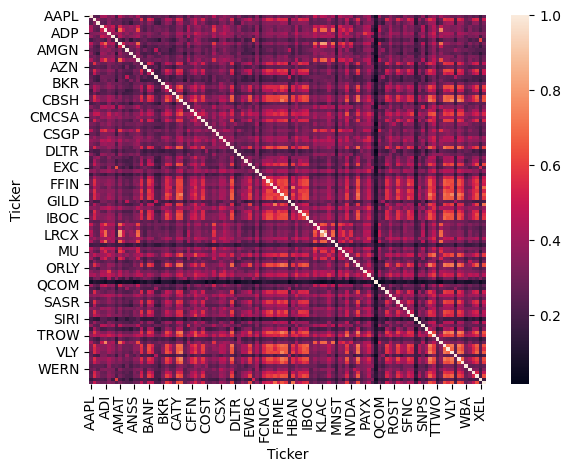

In [ ]:
sns.heatmap(pivot.corr()) #Disorganized correlation matrix

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


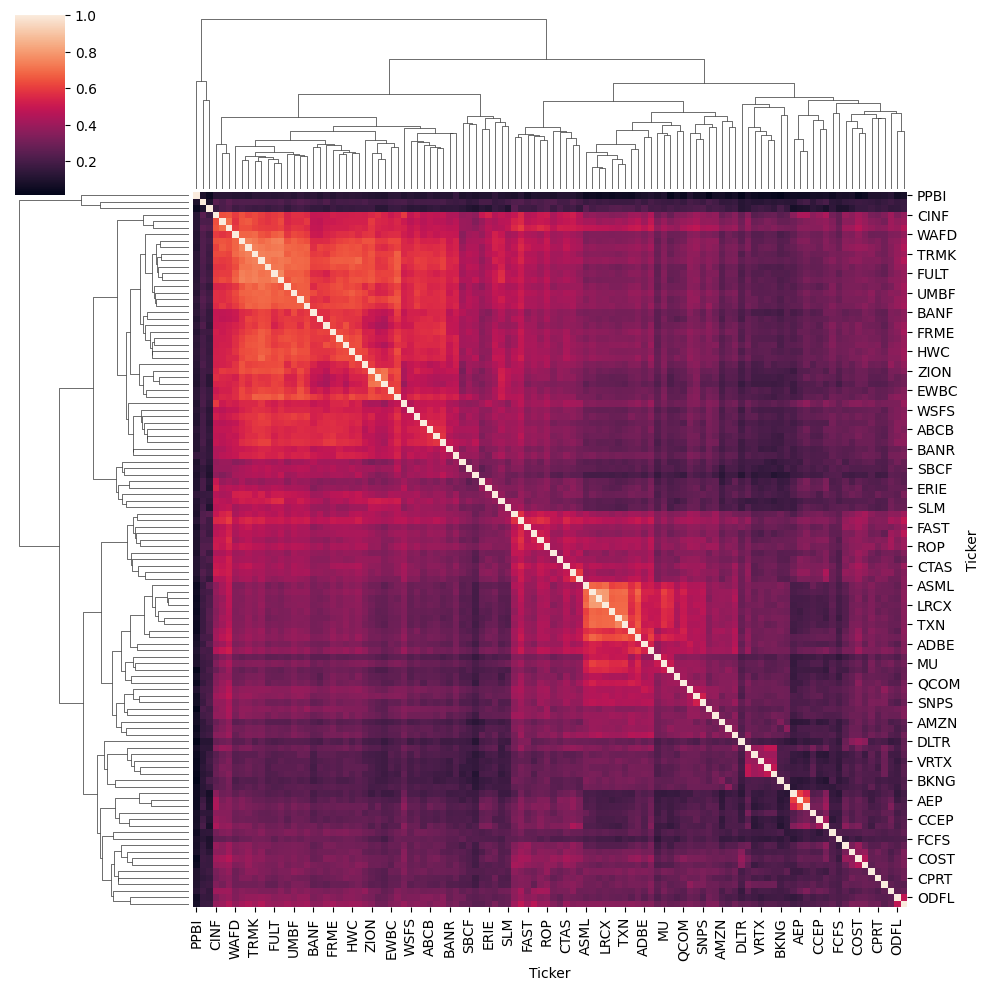

In [ ]:
sns.clustermap(pivot.corr()) #Correlation matrix with hierarchies (clusters) based on their similarity (matrix seriation)

In [ ]:
duplicates = pivot[pivot.duplicated()]
duplicates                      #This proves we have no duplicates

Ticker,AAPL,ABCB,ACGL,ADBE,ADI,ADP,ADSK,AEP,AMAT,AMD,...,VLY,VRTX,WABC,WAFD,WBA,WERN,WSFS,WTFC,XEL,ZION
Date,,,,,,,,,,,,,,,,,,,,,


In [ ]:
pivot[(pivot.T == 0).all()]   #There is no row with all columns with 0, which would have suggested a non-trading day. All days in the df are trading days

Ticker,AAPL,ABCB,ACGL,ADBE,ADI,ADP,ADSK,AEP,AMAT,AMD,...,VLY,VRTX,WABC,WAFD,WBA,WERN,WSFS,WTFC,XEL,ZION
Date,,,,,,,,,,,,,,,,,,,,,


In [ ]:
pivot.to_csv("/content/drive/MyDrive/Cleaned_Data/export_data.csv", index = True)